# Lecture 5 Transformer - Positional Encoding

#### Positional Encoding

Positional encoding is a technique used to add positional information to input embeddings in Transformer models, allowing the model to understand the order of tokens in a sequence (since Transformers are order-agnostic by default). Below are three Python coding examples that progressively illustrate how positional encoding works:
- Basic Positional Encoding (Sine & Cosine) from Scratch
- Positional Encoding in a Simple Transformer Model
- Learnable Positional Encoding Using PyTorch (optional)

#### 1. Basic Positional Encoding (Sine & Cosine) from Scratch
This example implements the classic sinusoidal positional encoding, as described in the original Transformer paper (Vaswani et al., 2017). The position is encoded using sine and cosine functions with different frequencies.

Positional Encoding (Sinusoidal):
 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  9.98334166e-02  9.95004165e-01
   9.99983333e-03  9.99950000e-01  9.99999833e-04  9.99999500e-01
   9.99999998e-05  9.99999995e-01  1.00000000e-05  1.00000000e+00
   1.00000000e-06  1.00000000e+00  1.00000000e-07  1.00000000e+00]
 [ 9.09297427e-01 -4.16146837e-01  1.98669331e-01  9.80066578e-01
   1.99986667e-02  9.99800007e-01  1.99999867e-03  9.99998000e-01
   1.99999999e-04  9.99999980e-01  2.00000000e-05  1.00000000e+00
   2.00000000e-06  1.00000000e+00  2.00000000e-07  1.00000000e+00]
 [ 1.41120008e-01 -9.89992497e-01  2.95520207e-01  9.55336489e-01
   2.99955002e-02  9.99550034e-01  2.99999550e-03  9.99995500e-01
   2.99999995e-04  9.99999955e-01  3.0

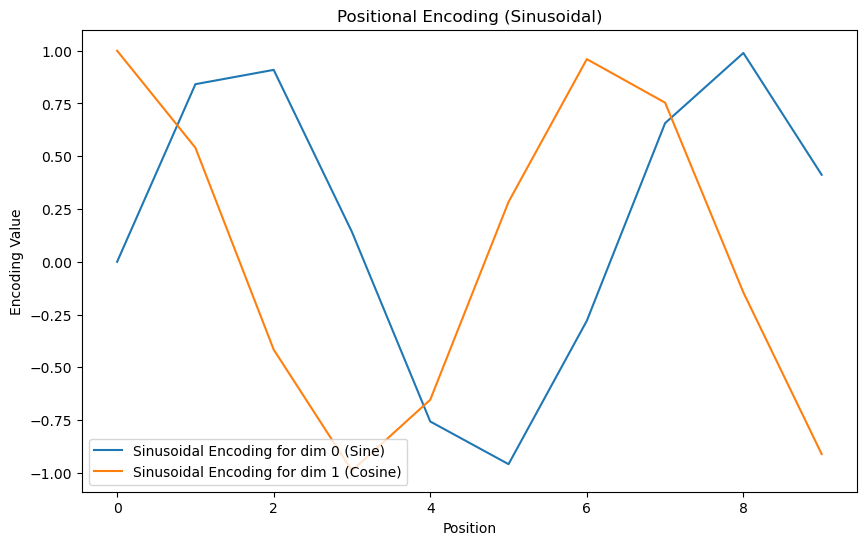

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_positional_encoding(seq_length, d_model):
    """
    Computes the positional encoding for a sequence of given length and model dimension (d_model).

    Args:
        seq_length: Length of the sequence (number of tokens)
        d_model: Embedding dimension (model size)

    Returns:
        A NumPy array of shape (seq_length, d_model) containing positional encodings
    """
    positional_encoding = np.zeros((seq_length, d_model))
    
    for pos in range(seq_length):
        for i in range(0, d_model, 2):
            positional_encoding[pos, i] = np.sin(pos / np.power(10000, (2 * i) / d_model))
            if i + 1 < d_model:
                positional_encoding[pos, i + 1] = np.cos(pos / np.power(10000, (2 * i) / d_model))
    
    return positional_encoding

# Example usage
seq_length = 10
d_model = 16

pos_encoding = get_positional_encoding(seq_length, d_model)

print("Positional Encoding (Sinusoidal):\n", pos_encoding)

# Visualize positional encoding for one dimension
plt.figure(figsize=(10, 6))
plt.plot(np.arange(seq_length), pos_encoding[:, 0], label="Sinusoidal Encoding for dim 0 (Sine)")
plt.plot(np.arange(seq_length), pos_encoding[:, 1], label="Sinusoidal Encoding for dim 1 (Cosine)")
plt.legend()
plt.title("Positional Encoding (Sinusoidal)")
plt.xlabel("Position")
plt.ylabel("Encoding Value")
plt.show()

**Positional Encoding Formula:**<br>
For a given position $p$ and model dimension $i$, the positional encoding is defined as:

$PE(p, 2i) = sin(\frac{p}{(10000^{2i/d_{model}})})$

$PE(p, 2i + 1) = cos(\frac{p}{(10000^{2i/d_{model}})})$

The alternating sine and cosine functions help the model differentiate between positions.

- Parameters:
    - seq_length: Length of the input sequence (number of tokens).
    - d_model: Dimensionality of the embedding space.
- Visualization:
    - The plot shows how the positional encoding changes for the first two dimensions of the embedding space (one using sine, the other cosine).
    
The output matrix represents the positional encodings for a sequence of 10 tokens with an embedding size of 16. You can observe that the sine and cosine values alternate.